# Analysis experiment 1

In [1]:
import hyperimp.evaluate.default_params as hyperimp
import pandas as pd
from scipy.io import arff
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load data
svm = pd.DataFrame(arff.loadarff('01 data/exp1/meta_svm.arff')[0])
rf = pd.DataFrame(arff.loadarff('01 data/exp1/meta_rf.arff')[0])

In [3]:
# algorithms to be evaluated
alg_names = ['rf', 'svm']
# hyperparameters to be evaluated
alg_params = {'svm': ['gamma','C','tol'],
              'rf': ['max_features','min_samples_leaf','min_samples_split']}
# parameters defined on a log and integer scale
logs = ['gamma', 'C', 'tol']
integer = ['min_samples_leaf', 'min_samples_split']

## Distribution of top _n_ per hyperparameter

In [4]:
n = 10
m = 50

# initialze alg objects
algs = hyperimp.init_algs('hyperimp/evaluate/parameters.csv', {'svm': svm, 'rf': rf})
# get top n data
dfs = [hyperimp.get_topn(alg, n, m, False) for alg in algs]

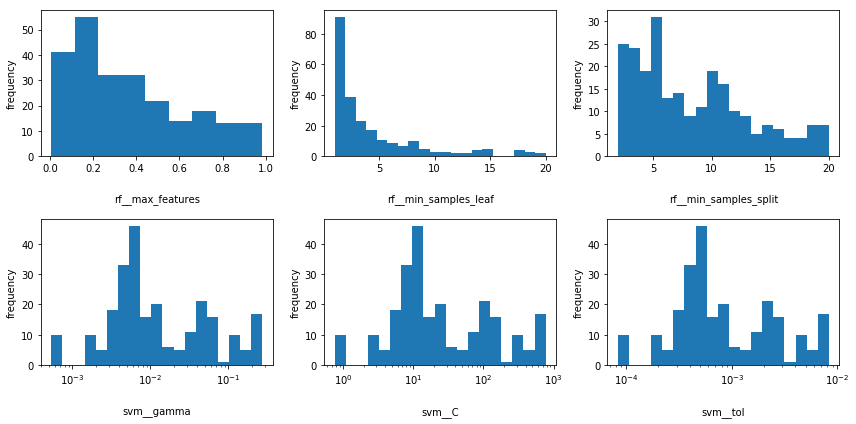

In [5]:
grid = True # put images on grid or not
cols = 3 # set nr columns in figure grid
ymax = None # set upper limit of plot; None for auto

if grid:
    nr_plots = sum([len(value) for key, value in alg_params.items()])
    rows = math.ceil(sum([len(value) for key, value in alg_params.items()])/cols)
    plt.figure(figsize = (4*cols,3*rows))
    index = 0

for alg, df in zip(alg_names, dfs):
    for param in alg_params[alg]:
        if grid:
            index += 1
            plt.subplot(rows, cols, index)
        bins = 'auto'
        log = param in logs
        intg = param in integer
        if log:
            bins = np.logspace(np.log10(min(df[param])), np.log10(max(df[param])), 20)
            plt.xscale('log')
        if intg:
            bins = int(max(df[param]) - min(df[param]) + 1)
        plt.hist(df[param], bins = bins)
        plt.xlabel('%s__%s' % (alg, param), labelpad=20)
        plt.ylim(0,ymax)
        plt.ylabel('frequency')
        plt.tight_layout()
        if not grid:
            #plt.savefig('figures/histograms/hist__%s__%s.eps' % (alg, param), format = 'eps')
            plt.show()
if grid:
    plt.show()

## Default parameters

In [10]:
n = 20
m = 899

for alg in algs:
    def_params = hyperimp.find_default(alg, n, m, False)
    display(pd.DataFrame(def_params).transpose())

,max_features,min_samples_leaf,min_samples_split
3.0,"(0.0841475722710597, 0.16603591102360588, 0.12...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
6.0,"(0.09159196670310936, 0.18092469988770518, 0.1...","(1.0, 1.0, 1.0)","(2.0, 2.0, 2.0)"
11.0,"(0.09159196670310936, 0.18092469988770518, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
12.0,"(0.09776028489869937, 0.1864761862637362, 0.14...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
14.0,"(0.09159196670310936, 0.18092469988770518, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
15.0,"(0.09159196670310936, 0.18092469988770518, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
16.0,"(0.09159196670310936, 0.18092469988770518, 0.1...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"
18.0,"(0.0841475722710597, 0.16603591102360588, 0.12...","(1.0, 1.0, 1.0)","(2.0, 2.0, 2.0)"
22.0,"(0.09159196670310936, 0.18092469988770518, 0.1...","(1.0, 1.0, 1.0)","(3.0, 3.0, 3.0)"
23.0,"(0.0841475722710597, 0.16603591102360588, 0.12...","(1.0, 1.0, 1.0)","(5.0, 5.0, 5.0)"


,C,gamma,tol
3.0,"(8.317567415137768, 15.128642337594519, 11.217...","(0.004647097047495463, 0.007961685269119882, 0...","(0.0004085378799741775, 0.0006079139701838516,..."
6.0,"(6.91921383252221, 12.019197846318455, 9.11939...","(0.003937641038238847, 0.006472513742605116, 0...","(0.0003615110906408533, 0.0005217395291487168,..."
11.0,"(6.91921383252221, 12.019197846318455, 9.11939...","(0.003937641038238847, 0.006472513742605116, 0...","(0.0003615110906408533, 0.0005217395291487168,..."
12.0,"(6.91921383252221, 12.019197846318455, 9.11939...","(0.003937641038238847, 0.006472513742605116, 0...","(0.0003615110906408533, 0.0005217395291487168,..."
14.0,"(8.317567415137768, 15.128642337594519, 11.217...","(0.004647097047495463, 0.007961685269119882, 0...","(0.0004085378799741775, 0.0006079139701838516,..."
15.0,"(6.91921383252221, 12.019197846318455, 9.11939...","(0.003937641038238847, 0.006472513742605116, 0...","(0.0003615110906408533, 0.0005217395291487168,..."
16.0,"(8.317567415137768, 15.128642337594519, 11.217...","(0.004647097047495463, 0.007961685269119882, 0...","(0.0004085378799741775, 0.0006079139701838516,..."
18.0,"(6.91921383252221, 12.019197846318455, 9.11939...","(0.003937641038238847, 0.006472513742605116, 0...","(0.0003615110906408533, 0.0005217395291487168,..."
22.0,"(8.317567415137768, 15.128642337594519, 11.217...","(0.004647097047495463, 0.007961685269119882, 0...","(0.0004085378799741775, 0.0006079139701838516,..."
23.0,"(8.317567415137768, 15.128642337594519, 11.217...","(0.004647097047495463, 0.007961685269119882, 0...","(0.0004085378799741775, 0.0006079139701838516,..."
